# Task: building a predictive model to estimate medical insurance charges based on demographic and lifestyle attributes. The goal is to use Multiple Linear Regression and evaluate the model's performance using appropriate metrics.

Tasks
1. Data Loading and Understanding
•	Load the dataset and inspect its structure.
•	Analyze the data types, missing values, and basic statistics for each column.
•	Identify the features and target variable.
2. Exploratory Data Analysis (EDA)
•	Create visualizations to understand the distribution of the charges variable.
•	Examine relationships between charges and other features (e.g., bmi, age, smoker).
•	Check for multicollinearity among numerical features.
3. Data Preprocessing
•	Apply appropriate preprocessing steps for numerical and categorical columns:
o	Standardize numerical features (age, bmi, children).
o	Encode categorical features (Gender, smoker, region) using One-Hot Encoding.
•	Use a Column Transformer to consolidate preprocessing steps.
4. Pipeline Construction
•	Build a pipeline that includes:
o	Data preprocessing using the column transformer.
o	A Multiple Linear Regression model for prediction.
5. Model Training
•	Split the dataset into training and testing subsets (e.g., 80%-20% split).
•	Train the regression model on the training set using the pipeline.
6. Model Evaluation
•	Evaluate the model on the test data using the following metrics:
o	Mean Squared Error (MSE)
o	Root Mean Squared Error (RMSE)
o	R-squared (R²)
•	Interpret the results and determine how well the model predicts charges.
7. Feature Importance Analysis
•	Analyze the coefficients of the regression model to identify the most impactful features influencing charges.
•	Discuss the implications of these findings.
8. Report Insights
•	Summarize your findings and suggest actionable insights based on:
o	The most significant features driving insurance charges.
o	The performance of the model.
o	Possible improvements to the analysis (e.g., feature engineering or alternative models).
________________________________________
Expected Deliverables
•	A comprehensive lab report that includes:
o	EDA results with visualizations.
o	Description of preprocessing steps and pipeline design.
o	Evaluation of model performance with relevant metrics.
o	Discussion of feature importance and insights.
•	A structured code implementation (optional if required).
________________________________________


# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Load dataset and check the first 5 rows**

In [4]:
df = pd.read_csv("Capstone Project_Insurance Analytics.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# checking data details in brief here
df.info()

#Observaions:

# Total 1338 records with 7 features
# No Null value 
# Numerics features are 4 and objects are 3
# Smoker is binary feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking duplicate valcues
df.duplicated().sum()
#we have 1 duplicate

1

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
#drop duplicate row
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Check statistics for numerical features**

In [9]:

df.describe()
# Observations: 
# Age:  Avg age in this data is 39 and min is 18 max is 64 also 50% is also 39 which means this is normally distributed
# Bmi: Min BMI is 15 and max is 53 and 50% is also 30 which is same as mean BMI of 30
# Children : ranges varies from 0-5 and 50% have 1 children only also 75% people have 2 childs 
# Charges: min 1121 max of 63779 which seems an outlier here, as we can see mea is 13k and 50% is 9K. 75% is only 16k and suddenly max goes to 63k which is abrubt jump. We will observe the distrrbution further steps

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Check statistics for categorical features
df.describe(include = ['object'])
# Observations:
#sex : 2 unique values and top are male
#Smoker:  2 unique values as this is binary data and mostly people are non smoker
#region: there are total 4 regions and most frequent is Southwest

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
df.columns
#creating separate list for numerical and categorical features over here
numeric_features = ['age', 'bmi', 'children','charges']
categorical_features  = [ 'sex','smoker','region']

**checking null values again**

In [12]:

df.isnull().sum()
#there are no null values in this data so we don't need to take care of imputation part

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Identify the features and target variable.**

****

**Here target is the charges and rest all are independent features**

**2. Exploratory Data Analysis (EDA)**

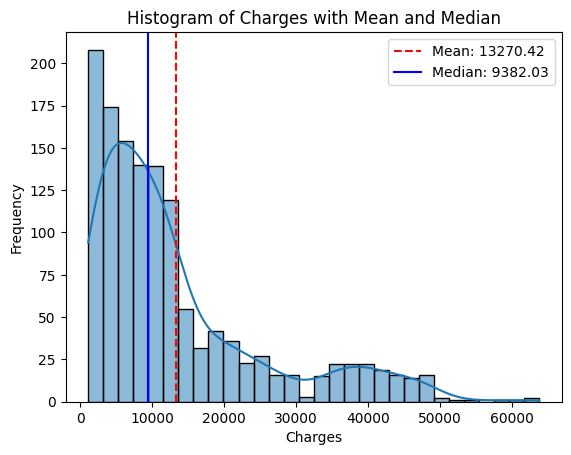

In [13]:
#first we will check the distribution of target variable Charges 
# Plot histogram with KDE
sns.histplot(df['charges'], kde=True)

# Calculate mean and median
mean = df['charges'].mean()
median = df['charges'].median()

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='blue', linestyle='-', label=f'Median: {median:.2f}')

# Add labels and legend
plt.legend()
plt.title('Histogram of Charges with Mean and Median')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Observation : Charges distribution is positive skewed and there are some outliers on positive side of distribution

**Lets check distribution of all Numeric features with histogram**

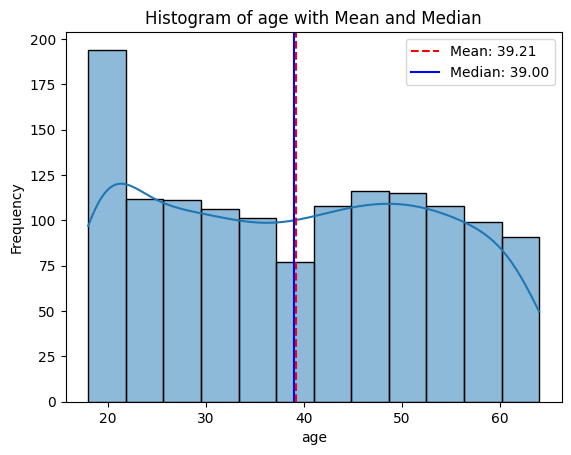

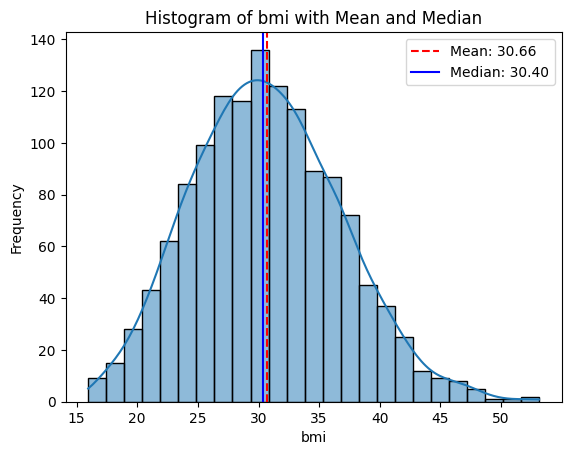

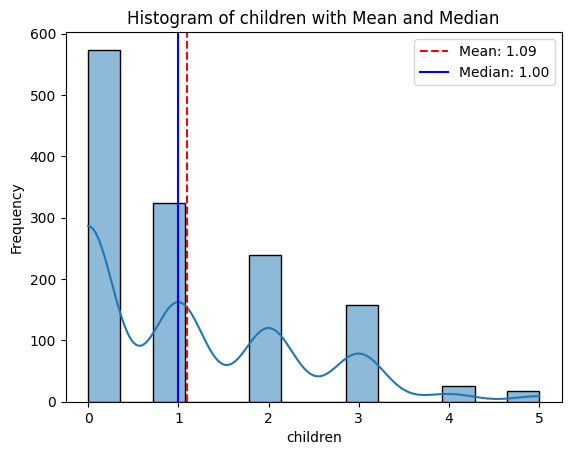

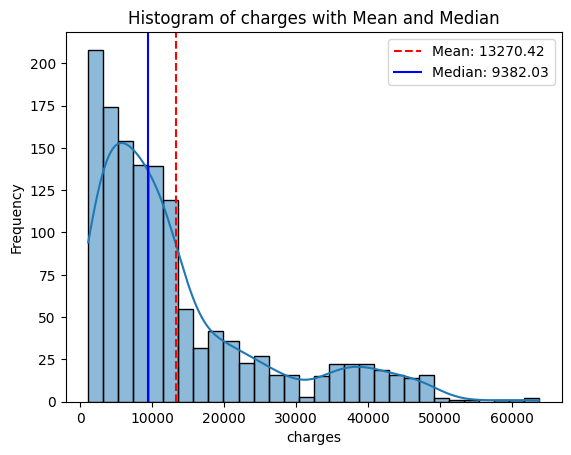

In [14]:
numeric_features
for feature in numeric_features:
    sns.histplot(df[feature], kde=True)
    # Calculate mean and median
    mean = df[feature].mean()
    median = df[feature].median()
    
    # Add vertical lines for mean and median
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='blue', linestyle='-', label=f'Median: {median:.2f}')
    
    # Add labels and legend
    plt.legend()
    plt.title(f'Histogram of {feature} with Mean and Median')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()

In [15]:
#observation:
# age: Distribution seems uniform and age 20 and 40 are making some difference in distribution rest all have similar frequency
# BMI: is normally distributed 
# children moslty -0 and min 5
# charges : postively skewed and there are outliers in this feature will futher confirm this by boxplot

**Checking Distribution counts for categorical features with help of bar plot**

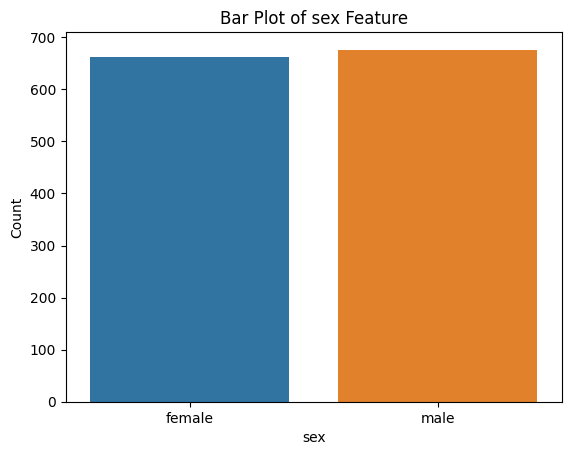

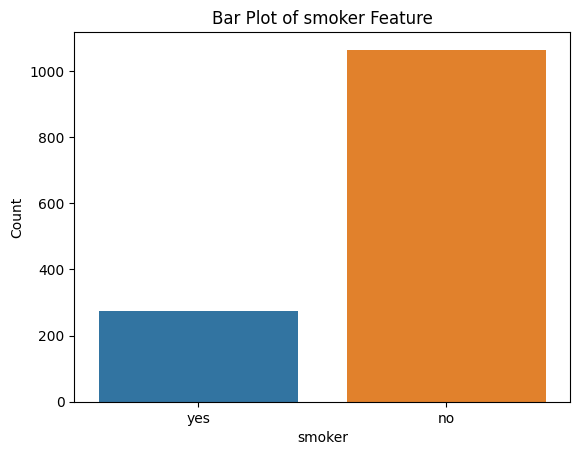

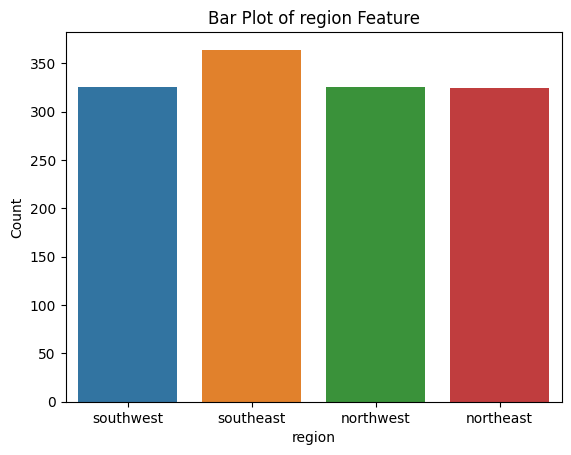

In [16]:

for feature in categorical_features:
    sns.countplot(x=df[feature])
    plt.title(f'Bar Plot of {feature} Feature')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

#observations:
# Gender: uniform distributed and same counts doesn't seems to be used as predictor
# Smoker: Good variance in the values and mostly non smokers
# Region: almost uniform just for southest region has some more counts than others

**Bi variate analysis for target with features**# 

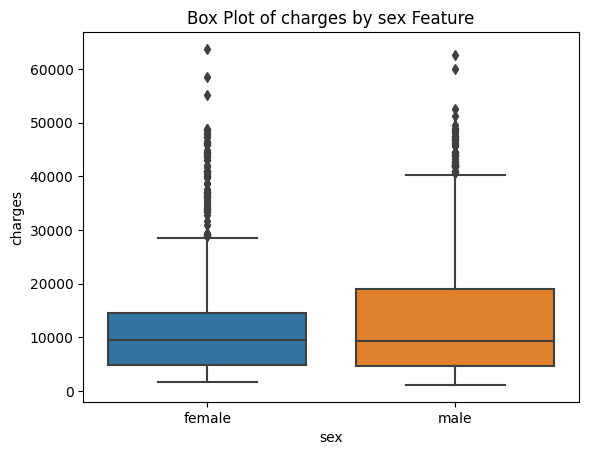

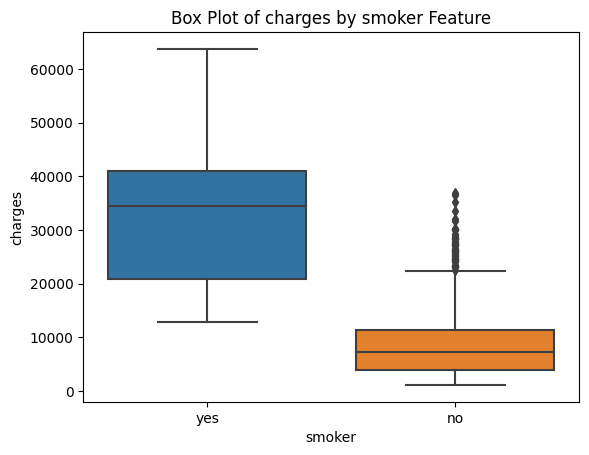

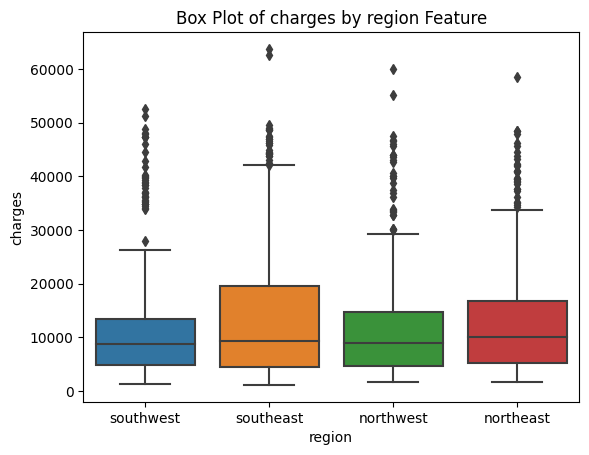

In [17]:
#Boxplots for comparing a numerical feature across region categories.
for feature in categorical_features:
    sns.boxplot(data=df, x=feature, y='charges')
    plt.title(f'Box Plot of charges by {feature} Feature')
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()

In [18]:
#Observation region seems to be most less significant here as the distribution wrt to charges seems same

****

**Checking the bi variate for numerical vs target feature here and visualise the relation of Independent feature with target**

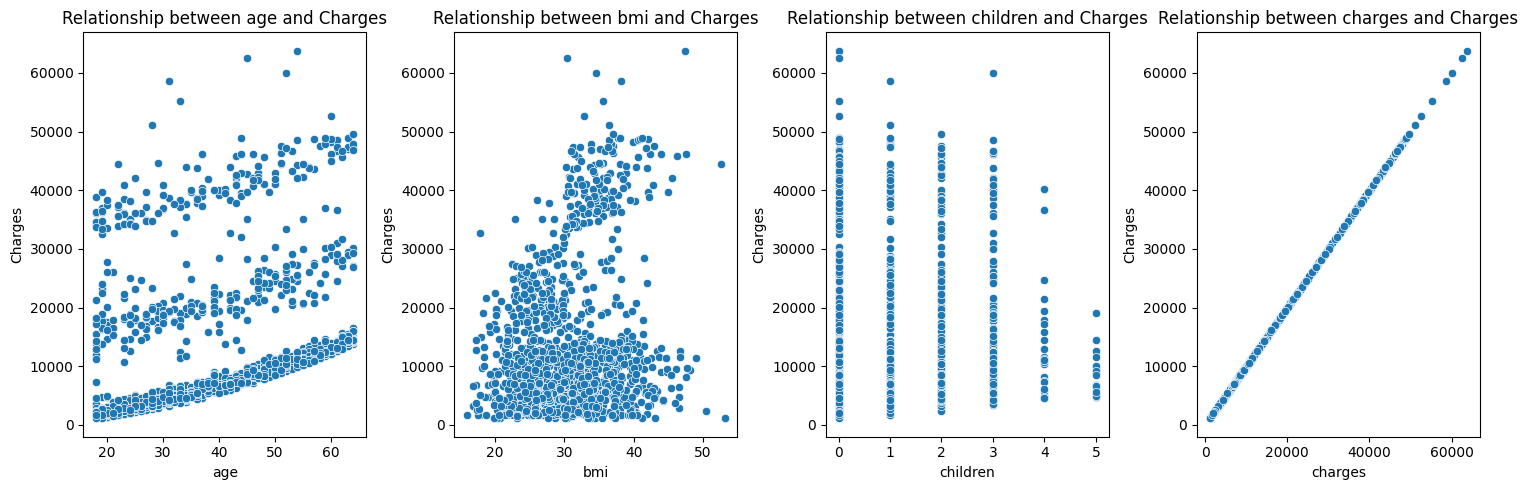

In [19]:
# Set up the plot size
plt.figure(figsize=(15, 5))

# Loop through each feature and plot it against the target variable 'charges'
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)  # Create subplots in a row
    sns.scatterplot(x=df[feature], y=df['charges'])
    plt.title(f'Relationship between {feature} and Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [20]:
#observation: Age and Bmi seems to be little positively related to target while no of children is  The children feature is likely representing the number of children, which is a categorical variable that takes a small set of distinct integer values (e.g., 0, 1, 2, 3, 4, etc.)

In [21]:
df['children'].value_counts(normalize = True)*100

children
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: proportion, dtype: float64

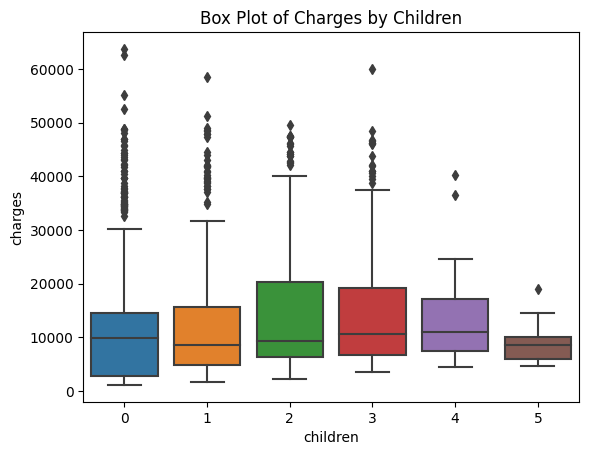

In [22]:
sns.boxplot(x=df['children'], y=df['charges'])
plt.title('Box Plot of Charges by Children')
plt.show()

**Checking the correlation b/w features**

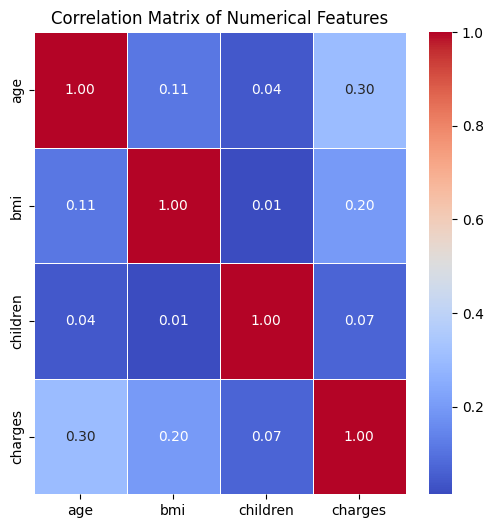

In [23]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [24]:
#charges and age are moderate poitive correlated == 0.30
#charges and Bmi are moderate poitive correlated == 0.20
#children is non significant here as it is close to 0


**Cheking VIF here for multicolinearity**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the dataframe (for intercept in regression)
X = add_constant(df[numeric_features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF for each feature
print(vif_data)

    Feature        VIF
0     const  32.325902
1       age   1.101927
2       bmi   1.043934
3  children   1.005193
4   charges   1.136490


**No Multicollinearity: Since all your features (except the intercept) have VIF values close to 1**

In [26]:
# Remove 'charges' from numeric_features list
numeric_features.remove('charges')
numeric_features

['age', 'bmi', 'children']

# Preprocessing with scaling and encoding and test train split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split the data into training and testing sets
X = df[numeric_features + categorical_features]  # All features
y = df['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize numerical features using StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform the test data using the parameters from the training set
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Step 3: Apply One-Hot Encoding on categorical features (can be done on both training and test data)
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True, dtype=int)

# Check the shapes after preprocessing
print(X_train.shape, X_test.shape)


(1070, 8) (268, 8)


In [28]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,0,0,1,0,0
1285,0.543313,-1.033082,-0.911192,0,0,0,0,0
1142,0.898745,-0.943687,-0.911192,0,0,0,1,0
969,-0.025379,0.622393,3.202629,0,0,0,1,0
486,1.040918,-1.504893,1.557100,0,0,1,0,0


**Model Training**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Initialize the Linear Regression model
model = LinearRegression()

# Step 2: Train the model on the training data
model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = model.predict(X_test)

**Model Evaluation**

In [30]:
# Step 4: Evaluate the model using MSE, RMSE, and R²

# 4.1: Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 4.2: Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4.3: R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 33596915.85136148
Root Mean Squared Error (RMSE): 5796.284659276275
R-squared (R²): 0.7835929767120722


**This means that model explains about 78.36% of the variance in the target variable (charges).
In general:
R² = 1: Perfect prediction.
R² = 0: The model explains none of the variance.
R² < 0: The model performs worse than just predicting the mean of the target.**

In [31]:
# Get the coefficients of the model
coefficients = model.coef_

# Print the coefficients
print("Coefficients:", coefficients)

# Get the intercept (constant term) of the model
intercept = model.intercept_

# Print the intercept
print("Intercept:", intercept)

Coefficients: [ 3.61497541e+03  2.03622812e+03  5.16890247e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Intercept: 8955.244801502879


In [32]:
features = ['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']  # List of feature names
coefficients = model.coef_  # Coefficients from the trained model

# Create a DataFrame to hold the feature names and their coefficients
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Create a DataFrame for the intercept
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model.intercept_]})

# Concatenate the intercept DataFrame with the original coefficients DataFrame
coeff_df = pd.concat([coeff_df, intercept_df], ignore_index=True)

# Print the DataFrame
coeff_df

,Feature,Coefficient
0,age,3614.975415
1,bmi,2036.228123
2,children,516.890247
3,sex_male,-18.591692
4,smoker_yes,23651.128856
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354
8,Intercept,8955.244802


**Interpretation of the Coefficients:**
**age (3614.98):**

For each additional year of age, the predicted charges increase by approximately $3,614.98, assuming all other variables remain constant.
This suggests that older individuals tend to have higher charges, which could be due to higher medical costs as people age.

**bmi (2036.23):**

For each additional unit of BMI (Body Mass Index), the predicted charges increase by approximately $2,036.23, assuming all other variables remain constant.
This suggests that individuals with higher BMI (potentially indicating health risks) tend to incur higher charges.

**children (516.89):**

For each additional child in the household, the predicted charges increase by $516.89, assuming all other variables remain constant.
This could reflect increased healthcare or insurance costs for households with more children.

**sex_male (-18.59):**

Being male (vs. female, assuming the reference category is female) is associated with a slight decrease in charges by approximately $18.59, assuming all other variables remain constant.
This is a relatively small coefficient, suggesting that gender does not have a large impact on the charges in this case.

**smoker_yes (23651.13):**

If an individual is a smoker (vs. a non-smoker, assuming the reference category is non-smoker), the predicted charges increase by approximately $23,651.13, assuming all other variables remain constant.
This is a significant increase and suggests that smoking has a strong impact on medical costs, which is consistent with healthcare data showing that smokers tend to have higher medical expenses.

**region_northwest (-370.68):**

Living in the northwest region (vs. the reference region, likely the "northeast" or "other" region) is associated with a slight decrease in charges by approximately $370.68, assuming all other variables remain constant.
This could reflect regional differences in healthcare costs.

**region_southeast (-657.86):**

Living in the southeast region is associated with a slight decrease in charges by approximately $657.86, assuming all other variables remain constant.
Again, regional variations could play a role here.

**region_southwest (-809.80):**

Living in the southwest region is associated with a slight decrease in charges by approximately $809.80, assuming all other variables remain constant.
Like the other regions, this might reflect regional differences in healthcare costs or pricing.

**Key Takeaways:**
Smoker status has the most substantial impact on charges, with smokers facing significantly higher charges compared to non-smokers.

Age, BMI, and children all have positive relationships with charges, meaning that older individuals, those with higher BMI, and those with more children tend to have higher charges.

Gender (male) and region (northwest, southeast, southwest) have much smaller effects on the charges, with region generally showing a slight negative impact on charges.
The coefficients represent the magnitude of change in charges for each unit change in the corresponding feature, holding all other features constant.

# Compare Between Models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Score is {model.score(X_test, y_test)}')

    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(X_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

    


Training Model LR 
-----------------------------------------------
Score is 0.7835929767120722
Training R-squared: 0.7417255854683333
Testing R-squared: 0.7835929767120722
Mean Squared Error: 33596915.85136148
Mean Absolute Error: 4181.194473753652
Training Model RF 
-----------------------------------------------
Score is 0.871354079839906
Training R-squared: 0.9237335046895743
Testing R-squared: 0.871354079839906
Mean Squared Error: 19972115.916446563
Mean Absolute Error: 2480.9476499320085
Training Model DT 
-----------------------------------------------
Score is 0.7471045942060708
Training R-squared: 0.9983078124756305
Testing R-squared: 0.7471045942060708
Mean Squared Error: 39261690.9496048
Mean Absolute Error: 2999.6473316268657
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8396108609727914
Training R-squared: 0.991686701904777
Testing R-squared: 0.8396108609727914
Mean Squared Error: 24900210.379031844
Mean Absolute Error: 2698.438

# Pipeline Implementation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assume df is your dataframe and 'charges' is the target variable
# Replace 'numeric_features' and 'categorical_features' with your actual column names
numeric_features = ['age', 'bmi', 'children']  #  numerical features
categorical_features = ['sex', 'smoker', 'region']  #  categorical features

# Separate features and target
X = df[numeric_features + categorical_features]
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

# Use ColumnTransformer to apply different preprocessing to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first preprocesses data, then applies linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [35]:

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 33596915.85136146
Root Mean Squared Error (RMSE): 5796.2846592762735
R-squared (R²): 0.7835929767120723



**Insights and further improvements**
  1. The most significant features driving insurance charges is smoker or not.The performance of the model is good as we are getting .78 rsquare score we can futher use adjusted r2 square for more clarity.Possible improvements to the analysis (e.g., feature engineering or alternative models).
  2. We can apply some feature importance technique or RFE recurssive feature eleimination approach here to gain more accurate predictions.
  3. we can use tree based approach as when we tried multiple models tree based ensemble model(Radnom forest) is giving good results without overfitting.
  4. Other than this we can create some more features and check the performance of model.
  5. As data size is small we can also use cross validation.
  6. We can fine tune some hyper paramters to improve the performance.




![Thanks](https://image.slidesharecdn.com/seattle-2019-05-211-190523174401/95/customer-intelligence-a-machine-learning-approach-5212019-22-638.jpg?cb=1558634118)